# How can the company improve collaboration?

## 📖 Background
You work in the analytics department of a multinational company, and the head of HR wants your help mapping out the company's employee network using message data. 

They plan to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

## The data
Importing the necessary libraries of python for exploration of the Dataset which are:
- **Pandas**, 
- **Numpy**, 
- **Pyplot from Matplotlib**, 
- **Seaborn**, 
- **Networkx**.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

The first 10 rows of Messages dataframe, which is imported from a csv file, is shown below!

In [3]:
#Importing Messages Data by reading csv
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
messages

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73
...,...,...,...,...
3507,469,1629,2021-11-24 05:04:57,75
3508,1487,1543,2021-11-26 00:39:43,25
3509,144,1713,2021-11-28 18:30:47,51
3510,1879,1520,2021-11-29 07:27:52,58


#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

The first 10 rows of Employees dataframe, which is imported from a csv file, is shown below!

In [4]:
#Importing Employees Data by reading csv
employees = pd.read_csv('data/employees.csv')
employees

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51
...,...,...,...,...
659,1830,Admin,UK,42
660,1839,Admin,France,28
661,1879,Engineering,US,40
662,1881,Sales,Germany,57


## Objectives

The Head of HR of company wants me to do the following:
  1. Finding Which departments are the most/least active?
  2. Finding Which employee has the most connections? 
  3. Identifying the most influential departments and employees.
  4. Finding, Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

## Exploration of Data
The data is in 2 different dataframes which needed to be joined to continue the research to get the most out of the data at hand. But before that we explore the dataframes seperately to get some understanding of dataframe!

### Messages dataframe
Following are the dataframe information about messages:
- The Dataframe has **3512 rows**,
- **Aveage message length** is **48.45 words**,
- **Shortest** message is **10 words** and **Longest** message is **88 words**.
- **50%** of the messages length is as small or smaller than **49 words**!

In [5]:
#Describing Dataframe
messages.describe()

,sender,receiver,message_length
count,3512.000000,3512.000000,3512.000000
mean,591.953303,627.052677,48.450740
std,397.953749,460.981865,22.857461
min,79.000000,3.000000,10.000000
25%,332.000000,277.000000,29.000000
50%,509.000000,509.000000,49.000000
75%,605.000000,878.000000,68.000000
max,1881.000000,1890.000000,88.000000


### Employees dataframe
Following are the dataframe information about messages:
- The Dataframe has **664 rows**,
- **Aveage age** is **40 years**,
- **Youngest** age is **22 years** and **Oldest** age is **59 years**.
- **50%** employees age is as small or smaller than **40 years**!

In [6]:
#Describing Dataframe
employees.describe()

,id,age
count,664.000000,664.000000
mean,793.710843,40.921687
std,498.462869,10.489521
min,3.000000,22.000000
25%,364.750000,33.000000
50%,725.500000,40.000000
75%,1191.500000,50.000000
max,1890.000000,59.000000


After exploring the Dataframes individually, we look combine the dataframes so the we can start the research and exploration process! The merged dataframe is named **"Mess_emply"** short for **Messages_employees**.

In [7]:
#Merging the two dataframes
mess_emply = messages.merge(employees, left_on = 'sender', right_on = 'id', how = 'inner')

#Changing the age column to integer
mess_emply['age'] = mess_emply['age'].apply(int)

mess_emply

,sender,receiver,timestamp,message_length,id,department,location,age
0,79,48,2021-06-02 05:41:34,88,79,Sales,France,33
1,79,63,2021-06-02 05:42:15,72,79,Sales,France,33
2,79,58,2021-06-02 05:44:24,86,79,Sales,France,33
3,79,70,2021-06-02 05:49:07,26,79,Sales,France,33
4,79,109,2021-06-02 19:51:47,73,79,Sales,France,33
...,...,...,...,...,...,...,...,...
3507,1881,1052,2021-11-18 04:57:00,40,1881,Sales,Germany,57
3508,1879,1520,2021-11-29 07:27:52,22,1879,Engineering,US,40
3509,1879,1543,2021-11-29 07:37:49,17,1879,Engineering,US,40
3510,1879,1520,2021-11-29 07:27:52,58,1879,Engineering,US,40


## Q1: Which departments are the most/least active?

We look at the data to find the Most active and Least active department of the company. The now Merged Dataframe **"Mess_emply"** is used to answer the question.

Using Seaborn Count plot, The departments are counted for each row where a message was either Sent which means that everytime Data is a message was sent, that counted as 1 Activity for that department! 

With that in mind, we found that **Sales is Most active** department while **Marketing is Least active** department of the company. There is a **substential difference of activity** between **Top 3 and Bottom 3** department, as shown in graph.


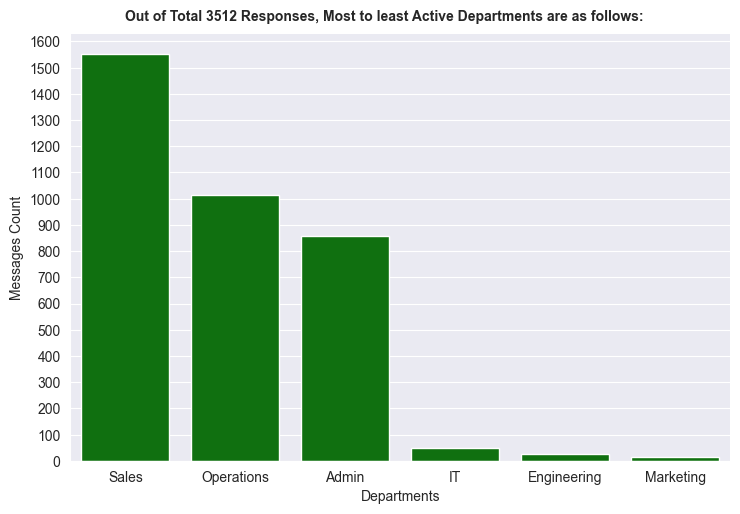

In [8]:
#Setting the style of plots to Darkgrid
sns.set_style('darkgrid')

#Plotting
g = sns.catplot(data = mess_emply, x = 'department', kind = 'count',
               order = ['Sales', 'Operations', 'Admin', 'IT', 'Engineering', 'Marketing']
               , aspect = 1.5, color = 'Green')
#Changing Labels and adding text
g.set(xlabel = 'Departments', ylabel = 'Messages Count')
plt.yticks(range(0, 1700, 100))
plt.text(-0., 1680, f'Out of Total {len(mess_emply)} Responses, Most to least Active Departments are as follows:',
        weight = 'bold')
plt.show()

## Q2: Which employee has the most connections?

Using the **"Mess_emply"** dataframe, finding the answer to 2nd question of Which employee has the most connections! The most amount of messages sent is used to find the Employee who has established the most connection in the company. We group the data on **'sender'**, **'location'** and Count the the amount of **'receiver'** of the messages.

By using this method, the results show the most connections made are by Employee of ID **'605'**

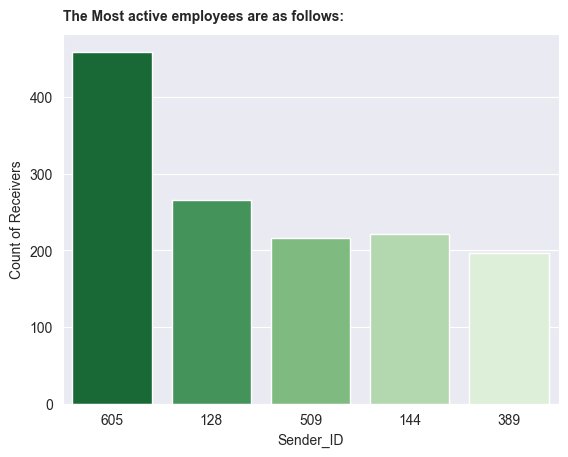

In [9]:
#Grouping the data
emply_connec = mess_emply.groupby(['sender', 'location', 'department'])['receiver'].apply(len).sort_values(ascending = False).reset_index()


#Top 5 employees with most activity
top_5 = emply_connec.head()

#Plotting
g = sns.barplot(data = top_5, x = 'sender', y = 'receiver', 
                order = [605, 128, 509, 144, 389], palette = 'Greens_r')

#Changing Labels and adding text
g.set(xlabel = 'Sender_ID', ylabel = 'Count of Receivers')
plt.text(-0.5, 500, f'The Most active employees are as follows:',
        weight = 'bold')
plt.show()

## Q3: Identify the most influential departments and employees.

Identification of Most influential departments and employees is dependant on the amount of activity done by the both the employees and the Departments. Using the Exploration from early an doing some explorations now, we conclude following:

In [10]:
#Data for emplys is from grouping in previous question
emplys = emply_connec


#Grouping data by department
dept = mess_emply.groupby('department').apply(len).sort_values(ascending=False)

#Selecting Employee
most_influential_emp = emplys['sender'][0]

#Selecting Department
most_influential_dept = dept.index[0]

#Making statment to Print the results
statment = f'Most Influential Employee is ID no. {most_influential_emp}.\nMost Influential Department is {most_influential_dept}.'
print(statment)

Most Influential Employee is ID no. 605.
Most Influential Department is Sales.


## Q4: Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

Based on different location, I wanted to see the activity of departments over **Months 6 - 11**. The details are below:

**France**:
- Admin department: Activity Dropped to lowest at **8th month** and no activity after **10th month**.
- Engineering department: Very less Activity **from 6th to 7th month** and then **no activty** past that.
- IT department: Slight increase in Activity **from 6th to 7th month** and then **no activty** past that.
- Marketing department: **No activity**.
- Operations department: Drop of Activity **from 6th to 7th month** and after that **Slow overtime decrease**.
- Sales department: Activity dropped **from 6th to 8th month** and **Slight fluctuation** after that ending at very decrease activity.

**Germany**:
- Admin department: **Decrease in activity from 6th to 10th month** with **No activity Post that period**
- Engineering department: **Increase in activity from 6th to 7th month** with **No activity Post that period**
- IT department: **Decrease in activity from 6th to 10th month** with **No activity Post that period**
- Marketing department: **Slight Decrease in activity from 7th to 8th month** with **No activity Prior or post that period**
- Operations department: **Decrease in activity from 7th to 9th month** with **No activity Prior or post that period**
- Sales department: **Increase and decrease in activity Overall**

**US**:
- Admin department: **Decrease in Activity overtime**
- Engineering department: **Very Slight fluctuation in Activity overtime**
- IT department: **No activity**
- Marketing department: **Some Activity from 6th to 7th month** with **No activity Post that period**
- Operations department: **Decrease in Activity overtime**
- Sales department:**Decrease in Activity overtime**

**Brasil**:
- Admin department: **No activity overtime**
- Engineering department: **No activity overtime**.
- IT department: **No activity overtime**.
- Marketing department: **No activity overtime**.
- Operations department: **Increase in activity from 6th to 7th month** with **no activity past 7th month**.
- Sales department: **Decraese in activity from 6th to 7th month** with **no activity past 7th month**.

**UK**:
- Admin department: **increase in activity from 7th to 10th month** with **No activity Prior or post that period**
- Engineering department: **No activity overtime**
- IT department: **No activity overtime**
- Marketing department: **No activity overtime**
- Operations department: **No activity overtime**
- Sales department: **Decrease in activity from 6th-9th month** with **No activity past 9th month**


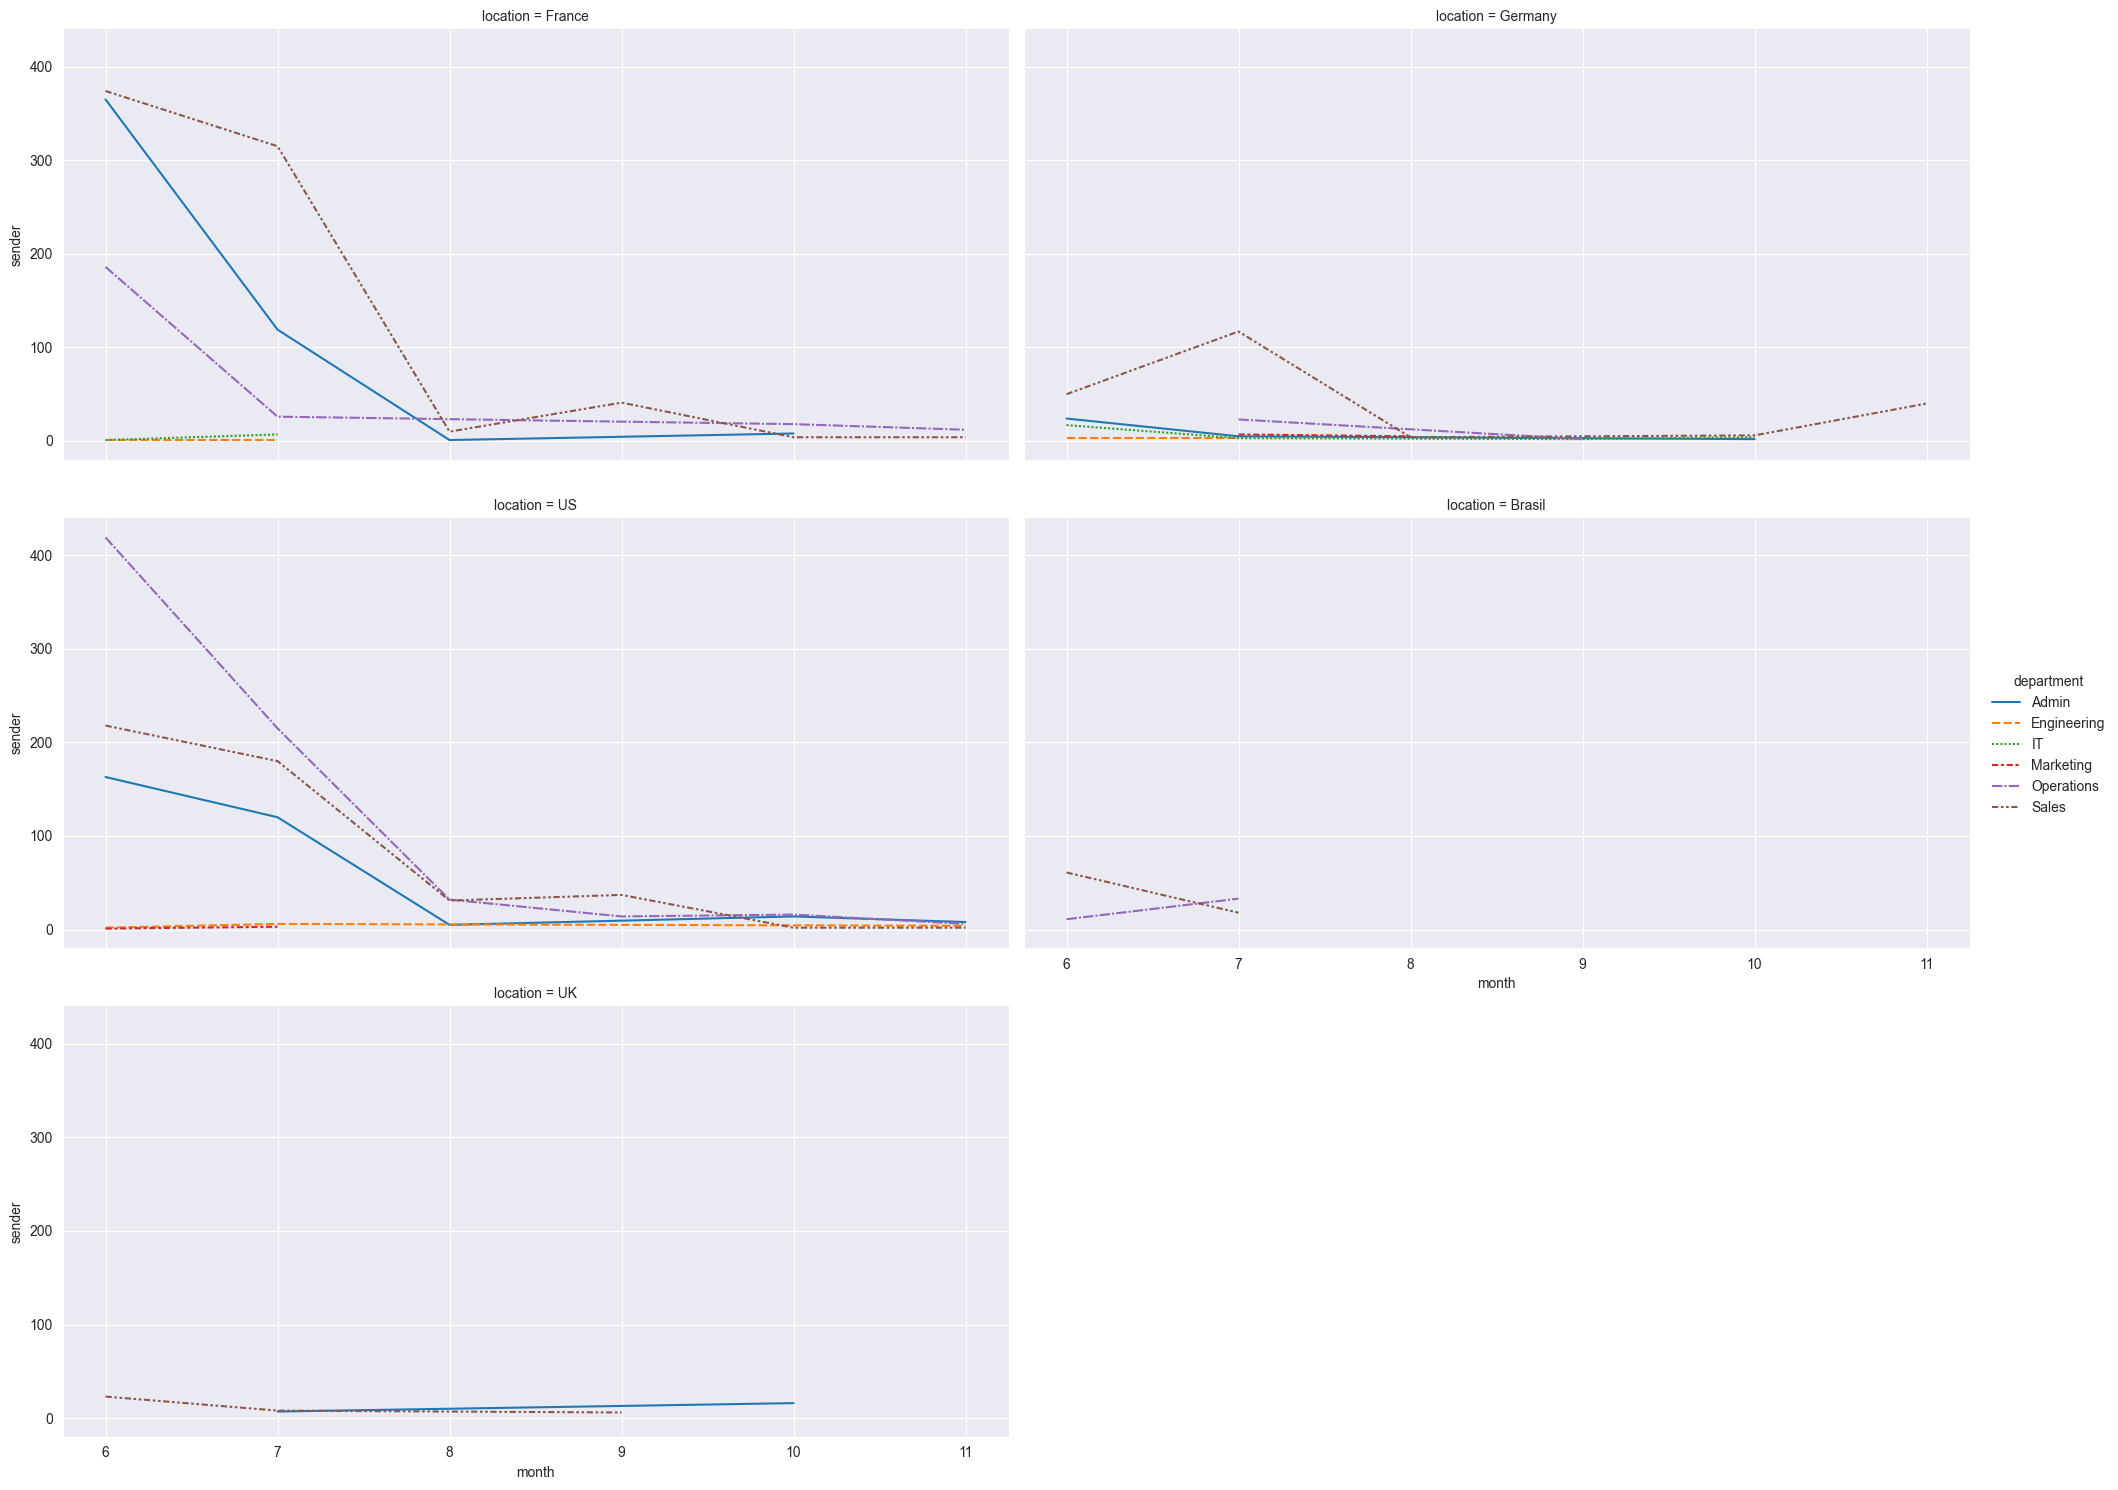

In [25]:
#Extracting the month out of timestamp and making a new 'month' column
mess_emply['month'] = mess_emply['timestamp'].dt.month

#Grouping Data
activity_overtime = mess_emply.pivot_table(['sender'], ['month', 'department', 'location'], aggfunc = len).reset_index()

#Plotting 
g5 = sns.relplot(data = activity_overtime, x = 'month', y = 'sender', col = 'location', hue = 'department', 
                 style = 'department', col_wrap = 2,
                aspect = 2, kind = 'line', color = 'blue', legend = True)
#Setting the labels
g.set(xlabel = 'Month (in number)', ylabel = 'Connections')
plt.show()

Using the Network Analysis, We connect the Departments to see which departments are in need of Collaboration Boost. Following is the information gathered:
- **Sales Department** Has the **Most Connections**, being connected to every single Department!
- **Admin Department** Has the **2nd Most Connections**, being connected to every Department, Except **Engineering Department**.
- **Operations and IT Department** have **3rd Most Connections**, not connected to **Marketing Department and Engineering Department**.
- **Marketing Department** is only connected to **Sales Department and Admin Department**, coming at **4th**.
- **Engineering Department** is the least connected department with **ONLY** connection to **Sales Department**.

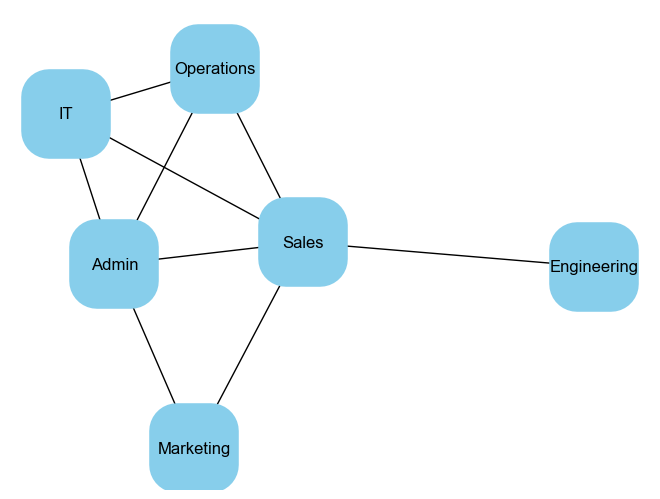

In [13]:
# Build a dataframe with your connections
m  = mess_emply.merge(mess_emply, left_on = 'sender', right_on = 'receiver')

# Build your graph
G = nx.from_pandas_edgelist(m, 'department_x', 'department_y')

# Custom the nodes:
nx.draw(G, with_labels=True, node_size=600, node_color="skyblue", node_shape="s", alpha=1, linewidths=40)
plt.show()

## Conclusion

1. According to Network Analysis, I found that these Departments Overall need serious attention of HR, which are in order of less activity to more:
- **Engineering Department**, 
- **Marketing Department**, 

2. After careful examination of the visuals and Data, a few insights for HR:
- In **France**, **Marketing Department** which had **NO activity**, 
- In **US**, **IT Department** which had **NO activity**,
- In **Brasil**, all departments Except **Sales and Operations Depeartment** had **NO activity**,
- In **UK**, all departments Except **Admin and Sales Depeartment** had **NO activity**.

---- THE END ----